# Student Performance Indicator

## 1. Problem statement

- This file to understand about the factors that affected to student's performance (test scores)

## 2. Data collection


- **Description:** This data set consists of the marks secured by the students in various subjects. The marks are affected by other variables such as Gender, Ethnicity,...
- **Link**: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.1 Import important libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2.2 Load dataset as Dataframe

In [12]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.3 Shape of dataset

In [14]:
print(f"The number of rows in dataset: {df.shape[0]}")
print(f"The number of cols in dataset: {df.shape[1]}")

The number of rows in dataset: 1000
The number of cols in dataset: 8


### 2.4 Dataset information

| Column                    | Description                                                  | Values                                                                 |
|---------------------------|--------------------------------------------------------------|------------------------------------------------------------------------|
| `gender`                  | Sex of students                                              | `Male`, `Female`                                                      |
| `race/ethnicity`          | Ethnic group of students                                     | `group A`, `group B`, `group C`, `group D`, `group E`                 |
| `parental level of education` | Final education level of the student's parents               | `bachelor's degree`, `some college`, `master's degree`, `associate's degree`, `high school`, `some high school` |
| `lunch`                   | Type of lunch before the test                                | `standard`, `free/reduced`                                            |
| `test preparation course` | Whether a test prep course was completed                     | `completed`, `none`                                                   |
| `math score`              | Score obtained in the math test                              | Integer (0–100)                                                       |
| `reading score`           | Score obtained in the reading test                           | Integer (0–100)                                                       |
| `writing score`           | Score obtained in the writing test                           | Integer (0–100)                                                       |


## 3. Data Check

- Check missing values
- Check duplicate
- Check data type
- Check the number of unique value in each column
- Check statistics of dataset
- Check various categories present in the different categorical column

### 3.1 Check missing value

In [24]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

- There is no missing value in dataset

### 3.2 Check duplicate

In [25]:
df.duplicated().sum()

0

- There is no duplicate value in dataset

### 3.3 Check data type

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check the number of unique value in each column

In [30]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 3.6 Basis Analysis

In [31]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
print(f"Categories in gender col:", df['gender'].unique())
print(f"Categories in race/ethnicity col:", df['race/ethnicity'].unique())
print(f"Categories in parental level of education lunch col:", df['parental level of education'].unique())
print(f"Categories in lunch col:", df['lunch'].unique())
print(f"Categories in test preparation course col:", df['test preparation course'].unique())
print(f"Range of math score col from {df['math score'].min()} to {df['math score'].max()}")
print(f"Range of reading score col from {df['reading score'].min()} to {df['reading score'].max()}")
print(f"Range of writing score col from {df['writing score'].min()} to {df['writing score'].max()}")

Categories in gender col: ['female' 'male']
Categories in race/ethnicity col: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education lunch col: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch col: ['standard' 'free/reduced']
Categories in test preparation course col: ['none' 'completed']
Range of math score col from 0 to 100
Range of reading score col from 17 to 100
Range of writing score col from 10 to 100


In [46]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical column: ", numerical_cols)
print("Categorical column: ", categorical_cols)

Numerical column:  ['math score', 'reading score', 'writing score']
Categorical column:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.7 Adding `Total Score` and `Average`

In [50]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = ((df['math score'] + df['reading score'] + df['writing score']) / 3).round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### 3.8 Distribution of mark for each subject (math, reading, writing)

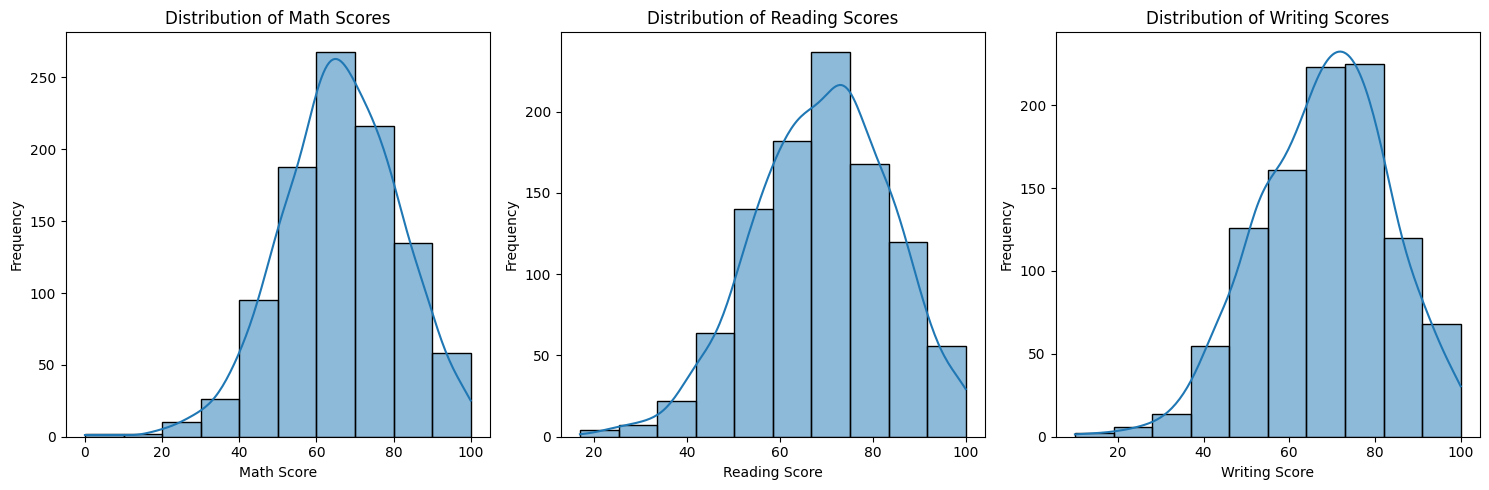

In [53]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Distribution of Math scores
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], bins=10, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Distribution of Reading scores
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], bins=10, kde=True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Distribution of Writing scores
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], bins=10, kde=True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

- As easy to see:
    - With `Math Score`:
        - The distribution is slightly left-skewed, concentrated in the 60–80 range.
        - There are some students who score very low (<30), which pushes the tail of the distribution to the left.
        - There are student score at point 0
    - With `Reading Score` and `Writing Score`:
        - The distribution peak is in the range of 70–80



### 3.9 Distribution of Male/Female

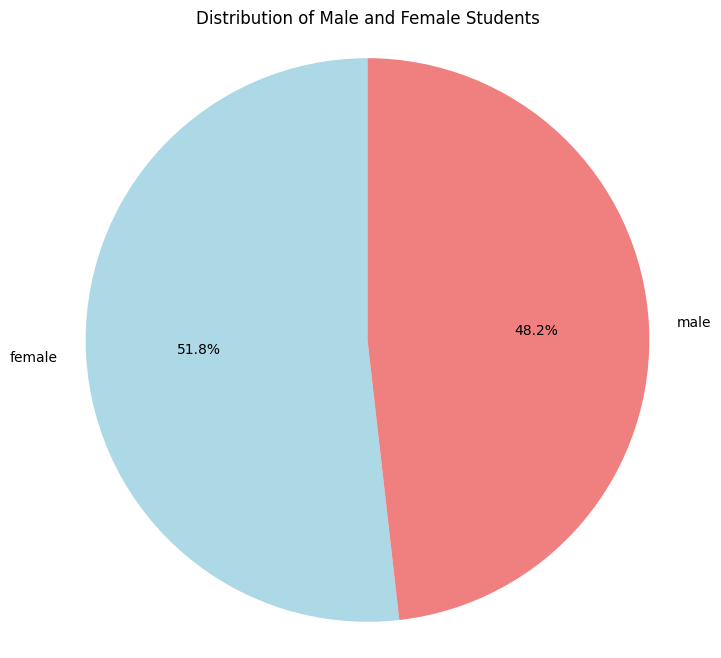

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Male and Female Students')
plt.axis('equal') 
plt.show()

- The distribution of male and female students are likely the same (51.8% with 48.2%)

## 4. Exploratory Data Analysis

### 4.1 The relationship between gender and total score/ average

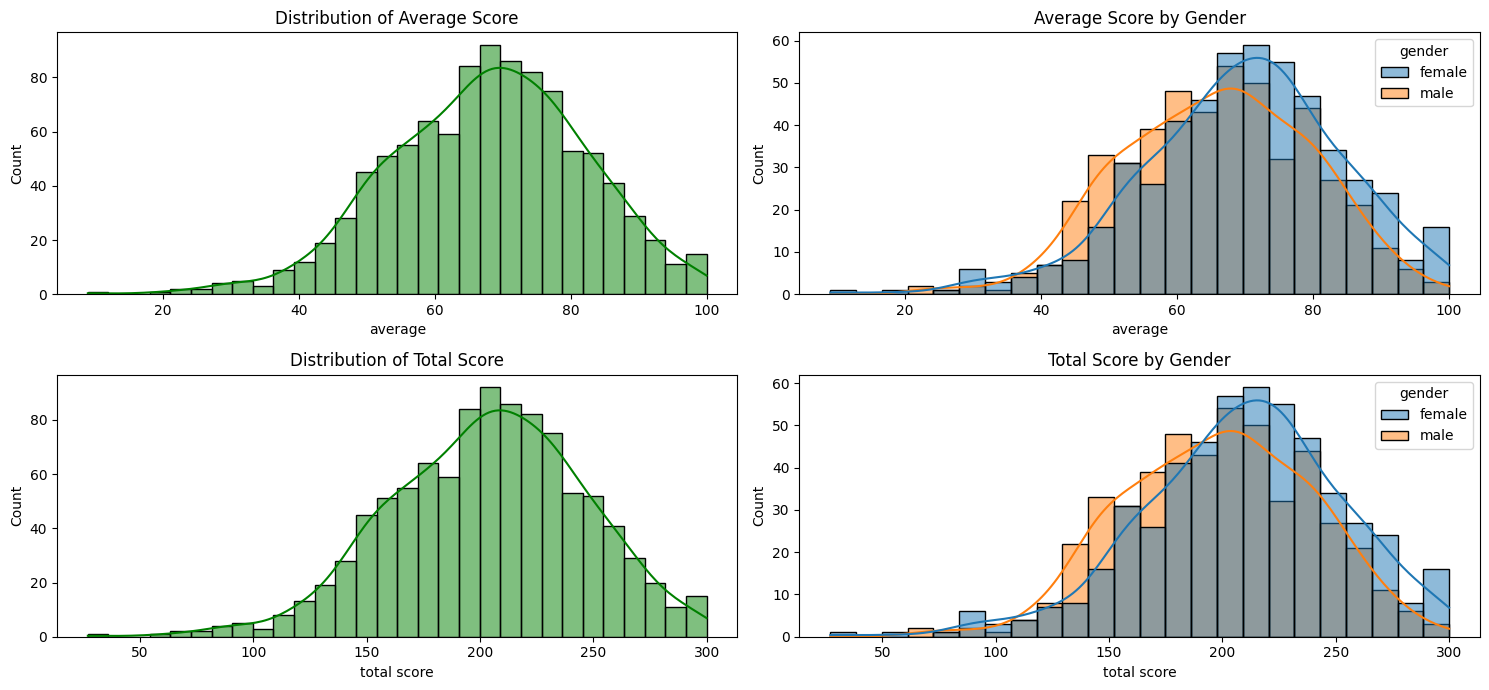

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(15, 7))

sns.histplot(data=df,x='average',bins=30,kde=True,color='g', ax=axs[0,0])
axs[0,0].set_title("Distribution of Average Score")
sns.histplot(data=df,x='average',kde=True,hue='gender', ax=axs[0,1])
axs[0,1].set_title("Average Score by Gender")

sns.histplot(data=df,x='total score',bins=30,kde=True,color='g', ax=axs[1,0])
axs[1,0].set_title("Distribution of Total Score")
sns.histplot(data=df,x='total score',kde=True,hue='gender', ax=axs[1,1])
axs[1,1].set_title("Total Score by Gender")
plt.tight_layout()
plt.show()

- Female students tend to score higher than males in both average and total scores.

### 4.2 Lunch type intake has any impact on student's performance ?

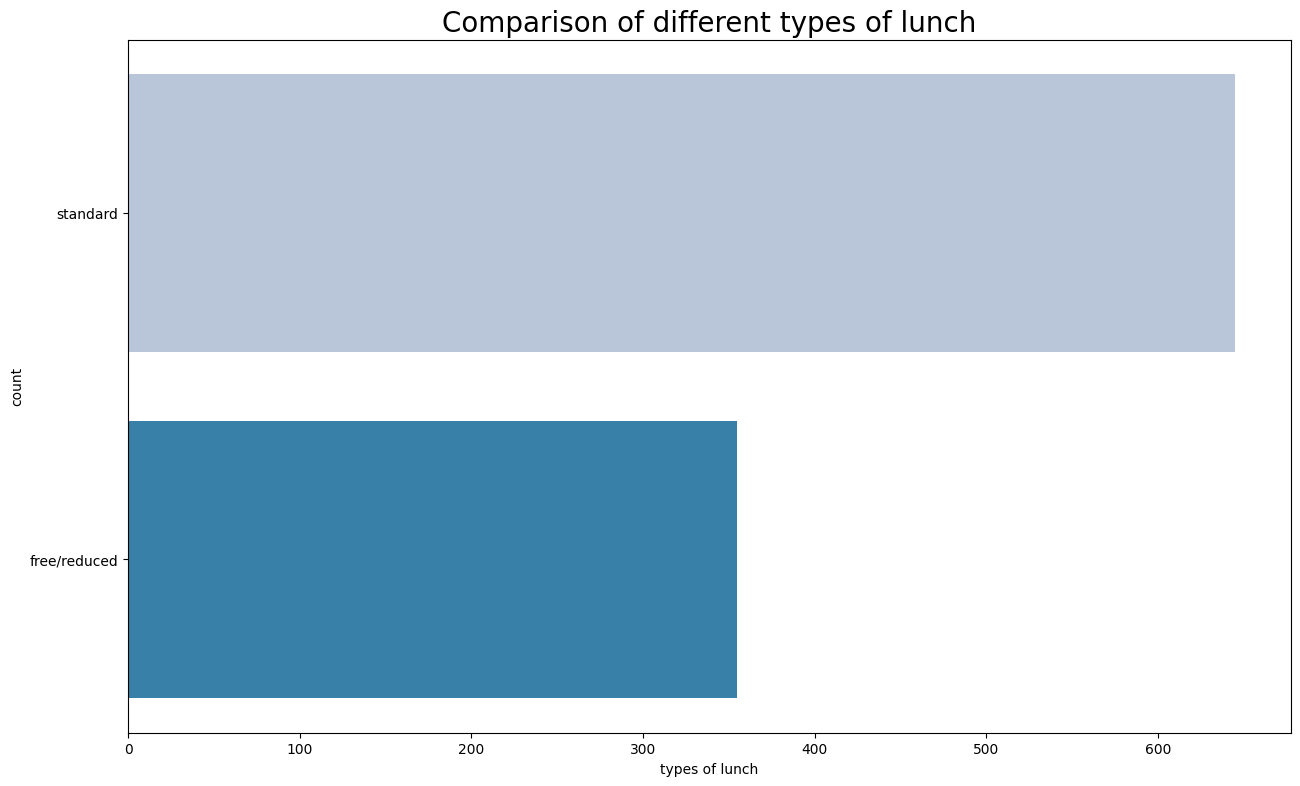

In [66]:
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- Students being served Standard lunch was more than free lunch

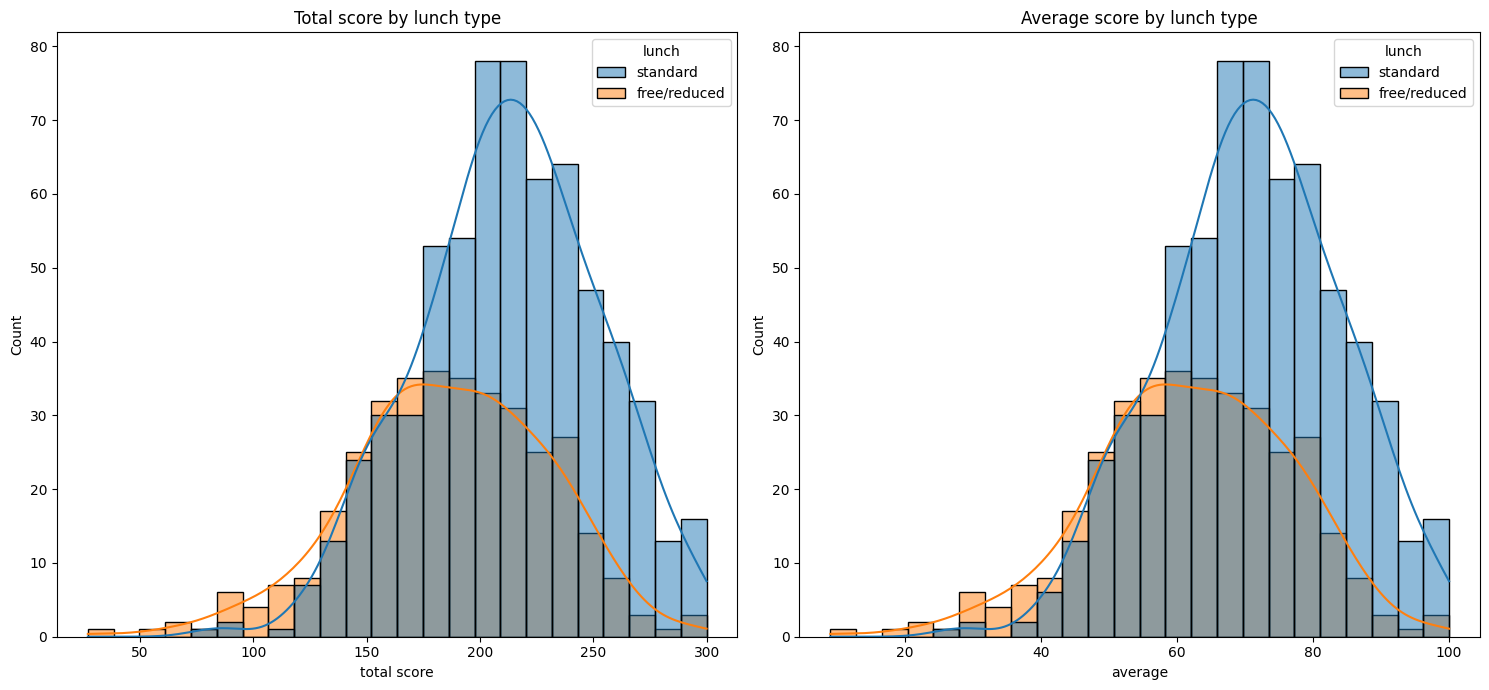

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df,x='total score',kde=True,hue='lunch', ax=axs[0])
axs[0].set_title('Total score by lunch type')
sns.histplot(data=df,x='average',kde=True,hue='lunch', ax=axs[1])
axs[1].set_title('Average score by lunch type')
plt.tight_layout()
plt.show()

- The students has standard lunch scored higher than the free lunch

### 4.3 Test prepration course has any impact on student's performance ?

<Axes: xlabel='gender', ylabel='writing score'>

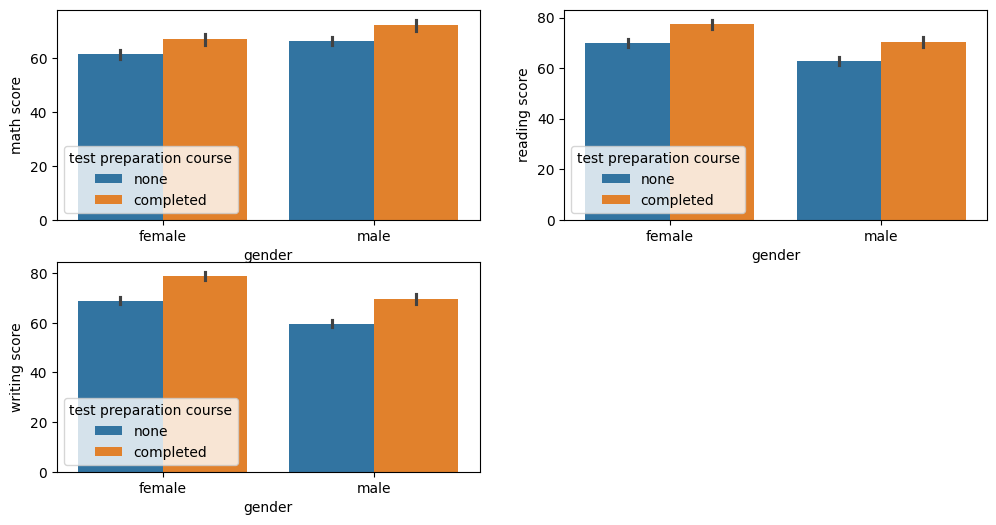

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['gender'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['gender'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['gender'], y=df['writing score'], hue=df['test preparation course'])

- Almost students who join test preparation course scored higher mark than others in all 3 subjects

### 4.4 Race/Ehnicity has any impact on student's performance ?

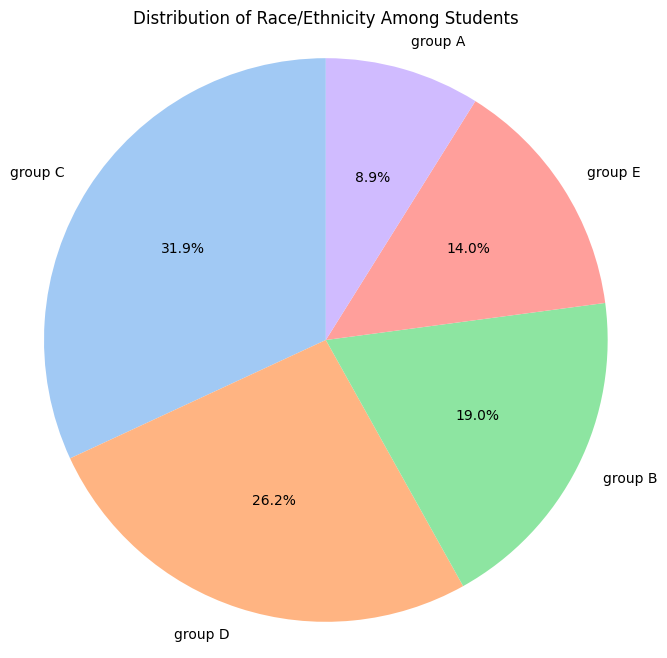

In [85]:
race_count = df['race/ethnicity'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(race_count, labels=race_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Race/Ethnicity Among Students')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- The distribution of students in group A is the highest and group D is the lowest.

<Axes: xlabel='race/ethnicity', ylabel='writing score'>

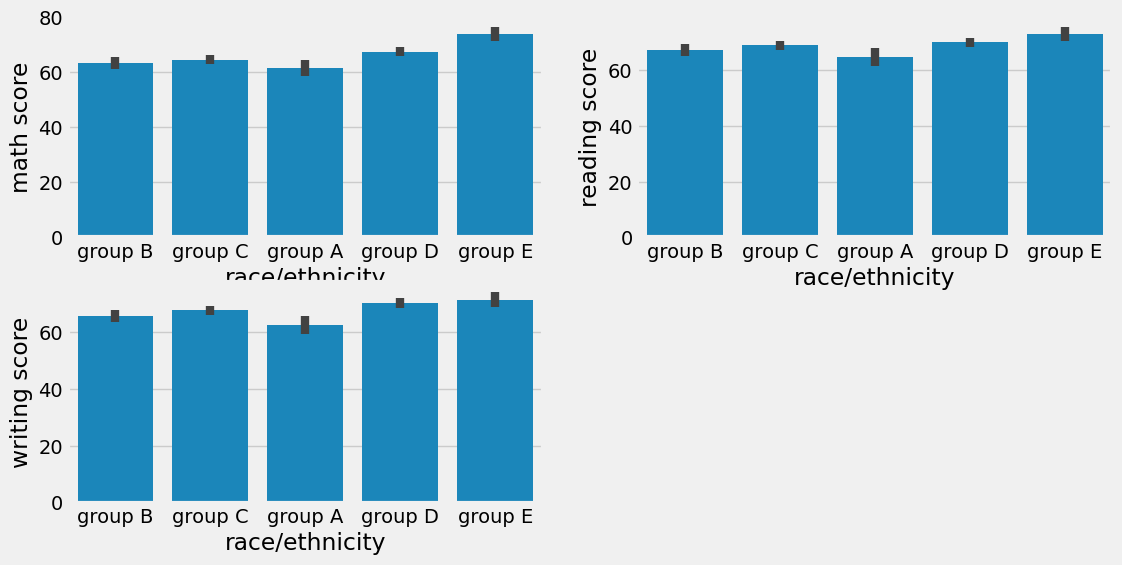

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['race/ethnicity'], y=df['math score'])
plt.subplot(2,2,2)
sns.barplot(x=df['race/ethnicity'], y=df['reading score'])
plt.subplot(2,2,3)
sns.barplot(x=df['race/ethnicity'], y=df['writing score'])

- Students in Group E has the highest score in 3 subjects among all groups

### 4.5 Parental education has any impact on student's performance ?

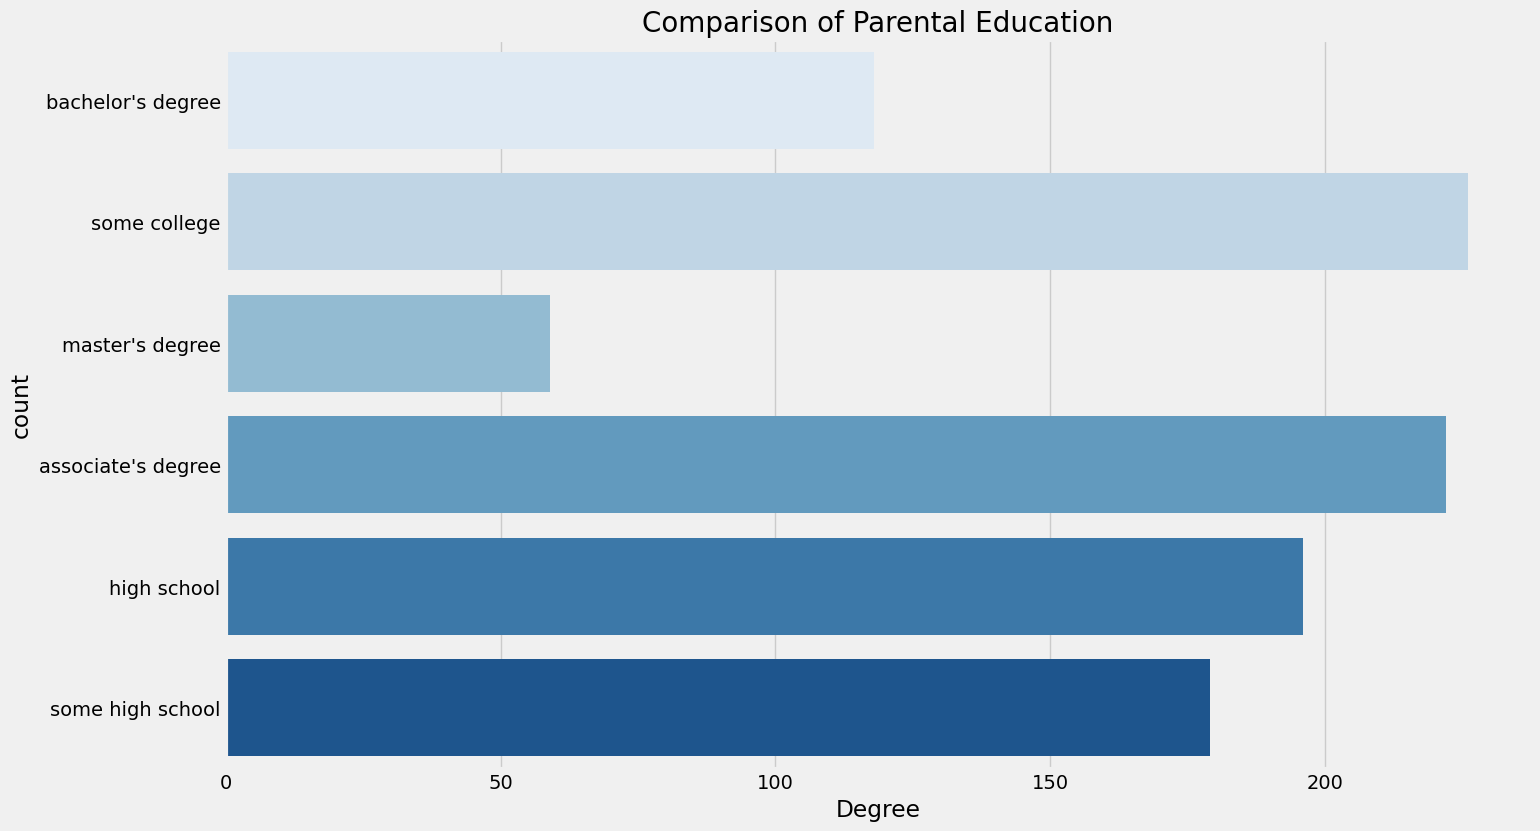

In [93]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college.

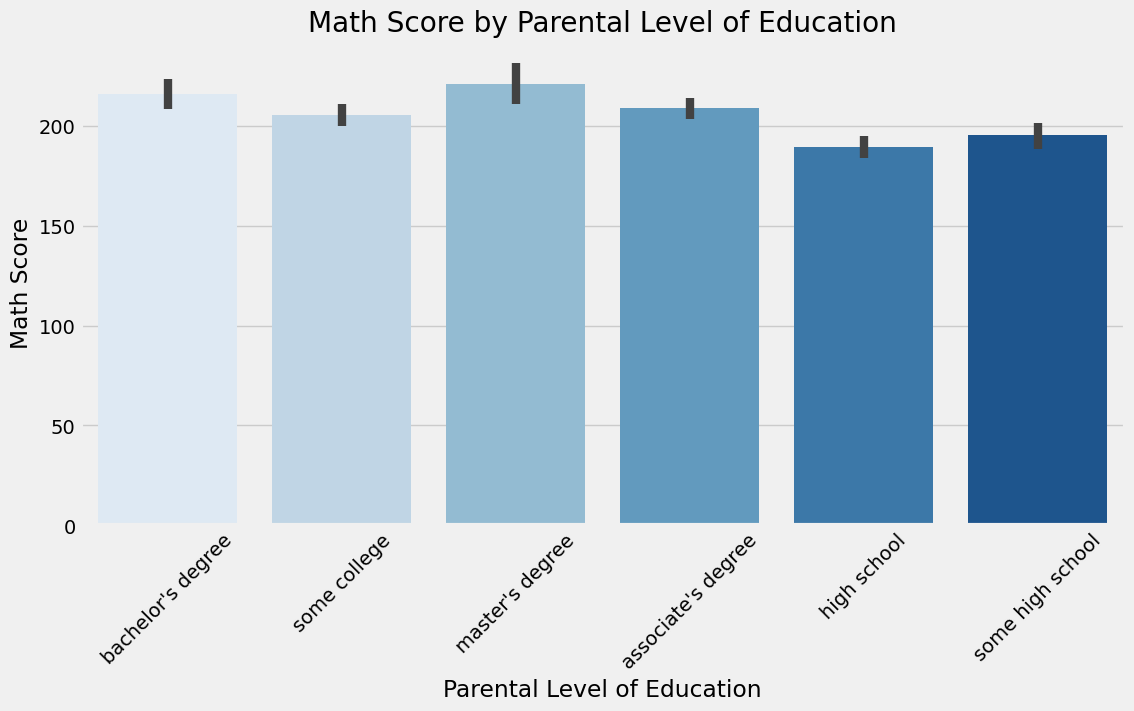

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='parental level of education', y='total score', palette='Blues')
plt.title('Math Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Math Score')
plt.xticks(rotation=45) 
plt.show()

- The score of student whose parents possess master and bachelor level education are higher than others.

## 5. Conclusion